In [ ]:
!pip install numpy
!pip install matplotlib

In [6]:
# binomial expansion
# (1+x)^n = 1 + n*x + (n*(n-1)/2*x^2) + (n*(n-1)*(n-2)/(2*3)*x^3) + ...

RAY = 1e27

# r = 1 + x
def binomial_approx(r, n):
    if r > RAY:
        x = r - RAY
        x1 = n * x
        x2 = x1 * ((n - 1) if n > 1 else 0) / 2 * x / RAY
        x3 = x2 * ((n - 2) if n > 2 else 0) / 3 * x / RAY
        return RAY + x1 + x2 + x3
    elif r < RAY:
        x = RAY - r
        x1 = n * x
        x2 = x1 * ((n - 1) if n > 1 else 0) / 2 * x / RAY
        x3 = x2 * ((n - 2) if n > 2 else 0) / 3 * x / RAY
        return RAY - x1 + x2 - x3
    else:
        return RAY

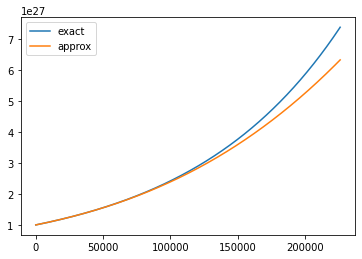

7.3889253673702e+27
6.33326256224876e+27
1.0556628051214401e+27


In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 365 * 24 ^ 3600
T = N * 20
RAY = 1e27
R = 0.10 * RAY

y = RAY
ys = [y]
zs = [binomial_approx(0, 0)]

for i in range(1, T):
    y *= (RAY + R/N) / RAY
    z = binomial_approx(RAY + R/N, i)
    ys.append(y)
    zs.append(z)

plt.plot(ys, label = "exact")
plt.plot(zs, label = "approx")
plt.legend()
plt.show()

print(ys[-1])
print(zs[-1])
print(ys[-1] - zs[-1])